# Instance based vs Model based Learning
In this notebook we will look at a simple workflow of ML. 
* Collect Data
* Study Data
* Select Model
* Train Model and Test Model
* Make Predictions

## Our Imports
* Pandas - to read csv
* Numpy - For Numerical Computations
* Matplotlib - For plotting graphs
* Locale - Converting strings like 50**,**793.62 to numeric 50793.62
* Sklearn - For ML models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')
%matplotlib inline

## Downloading and Combining Data
Download the *Better Life Index data* from the [OECD’s website](https://goo.gl/0Eht9W) and *GDP per capita* from the [IMF’s website](http://goo.gl/j1MSKe), and save them in a folder - *datasets*.

### Let's Look at the datasets

In [2]:
bli_df = pd.read_csv('./datasets/BLI2015_16072018183305817.csv')

bli_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.9,NaN,NaN


In [3]:
gdp_df = pd.read_csv('./datasets/WEO_Data.csv', encoding = 'latin1')

gdp_df.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.32",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30",2011.0


### Extract Desired Data
We want Life Satisfaction data from Better Life Index dataset and GDP per capita value from GDP per capita dataset. Let's extract them in different dataframes.

In [4]:
ls_df = bli_df[['Country', 'Value']]

ls_df = ls_df[(bli_df['Indicator'] == 'Life satisfaction') & (bli_df['Inequality'] == 'Total')]

ls_df.head()

,Country,Value
2669,Australia,7.3
2670,Austria,6.9
2671,Belgium,6.9
2672,Canada,7.3
2673,Czech Republic,6.5


In [5]:
gdp_df = gdp_df[['Country', '2015']]

gdp_df.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,"3,995.38"
2,Algeria,"4,318.14"
3,Angola,"4,100.32"
4,Antigua and Barbuda,"14,414.30"


### Merging The Values
We will merge the values of the extracted data based on the Country column.

In [6]:
gdp_vs_ls_df = pd.merge(gdp_df, ls_df.reset_index(drop=True), on='Country')

gdp_vs_ls_df.head()

,Country,2015,Value
0,Australia,"50,961.87",7.3
1,Austria,"43,724.03",6.9
2,Belgium,"40,106.63",6.9
3,Brazil,"8,670.00",7.0
4,Canada,"43,331.96",7.3


Converting values unders 2015 column to floats using locale.atof

In [7]:
gdp_vs_ls_df['2015'] = gdp_vs_ls_df['2015'].apply(atof)

A sanity check that there are no missing values.

In [8]:
gdp_vs_ls_df.isna().sum()

Country    0
2015       0
Value      0
dtype: int64

## Removing Some Values
Author removed some values from dataset. We will be removing those for consistency. To know why the book did it go to section **Main Challenges of Machine Learning**.

In [9]:
ALL_COUNTRIES = list(pd.unique(gdp_vs_ls_df['Country']))

ALL_COUNTRIES

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Russia',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States']

In [10]:
COUTRIES_TO_REMOVE = ['Brazil', 'Norway', 'Switzerland', 'Luxembourg', 'Mexico', 'Chile', 'Czech Republic']

In [11]:
gdp_vs_ls_df = gdp_vs_ls_df[gdp_vs_ls_df['Country'].isin(set(ALL_COUNTRIES) - set(COUTRIES_TO_REMOVE))]
gdp_vs_ls_df.shape

(29, 3)

## Some Visualizations

Book Mentioned 5 countries in the table, and visualization. Let's visualize them in compairson to other countries.

In [12]:
COUNTRIE_OF_INTEREST = ['Hungary', 'Korea', 'France', 'Australia', 'United States']

In [13]:
blue_pts = gdp_vs_ls_df[gdp_vs_ls_df['Country'].isin(set(ALL_COUNTRIES) - set(COUNTRIE_OF_INTEREST))]
red_pts = gdp_vs_ls_df[gdp_vs_ls_df['Country'].isin(COUNTRIE_OF_INTEREST)]

blue_pts.shape, red_pts.shape

((24, 3), (5, 3))

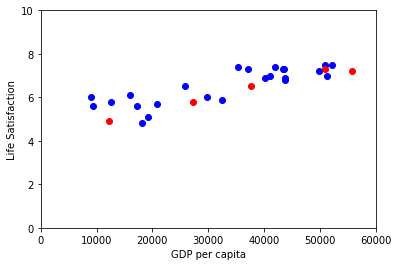

In [14]:
plt.scatter(blue_pts['2015'], blue_pts['Value'], color='blue')
plt.scatter(red_pts['2015'], red_pts['Value'], color='red')
plt.xlabel('GDP per capita')
plt.ylabel('Life Satisfaction')
plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()

There does seem to be a trend here! Although the data is noisy (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country’s GDP per capita increases. **So you decide to model life satisfaction as a linear function of GDP per capita**. This step is called *model selection*: you selected a linear model of life satisfaction with just one attribute, GDP per capita.

$$life\_satisfaction = \theta_{0} + \theta_{1}\times{GDP\_per\_capita}$$

This model has two model parameter - $\theta_{0}$ and $\theta_{1}$. By tweaking these we can make our model represent any linear function of GDP_per_capita.

![A few possible linear models](../../images/0118.png)

## Train Model
Before using this model to make any good predictions we need to find suitable values for $\theta_{0}$ and $\theta_{1}$. This means we need to find values $\theta_{0}$ and $\theta_{1}$ for which our model performance its best. What is best? We need to define an objective function or a fitness function that gives a single value for the fitness of the model. Leaving the hard core details aside, this is where Linear Regression comes in.

Let's make Linear Regression model and see the values of coefficients using sklearn library. Sklearn will train a Linear Regression model over our data using a predefined objective function and will give us results.

In [20]:
train_dataset = gdp_vs_ls_df[['2015', 'Value']].values

X_train = np.reshape(train_dataset[:, 0], (-1, 1))
y_train = np.reshape(train_dataset[:, 1], (-1, 1))

X_train.shape, y_train.shape

((29, 1), (29, 1))

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test and Predictions
Not the best way to test as the data includes data from the training set. For more see the **Testing and Validating** section in chapter notes.

In [22]:
test_dataset = red_pts[['2015', 'Value']].values

X_test = np.reshape(test_dataset[:, 0], (-1, 1))
y_test = np.reshape(test_dataset[:, 1], (-1, 1))

X_test.shape, y_test.shape

((5, 1), (5, 1))

In [23]:
print('Predictions:', model.predict(X_test))
print('Ground Truth:', y_test)

Predictions: [[ 7.35606771]
 [ 6.70347769]
 [ 5.45422051]
 [ 6.18875719]
 [ 7.59395   ]]
Ground Truth: [[ 7.3]
 [ 6.5]
 [ 4.9]
 [ 5.8]
 [ 7.2]]


In [24]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[ 5.9624234]]


## Instance-based Approach
Above we used Linear Regression a model-based approach. Let's use K-Nearest Neighbors an instance-based approach and see the predictions.

In [25]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [26]:
print('Predictions:', model.predict(X_test))
print('Ground Truth:', y_test)

Predictions: [[ 7.26666667]
 [ 7.06666667]
 [ 5.43333333]
 [ 6.1       ]
 [ 7.23333333]]
Ground Truth: [[ 7.3]
 [ 6.5]
 [ 4.9]
 [ 5.8]
 [ 7.2]]


In [27]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[ 5.76666667]]
